In [ ]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


os.chdir(r'C:\Users\cathe\Desktop\llms_phishing_email_detection')
SAVE_DATA_DIRECTORY = r'data\processed'

testdf_phishing = pd.read_csv(f'{SAVE_DATA_DIRECTORY}\\df_email.csv')
dict_result_list = [

    f'{SAVE_DATA_DIRECTORY}\\final_results_{"llama-3.1-70b-versatile"}.csv',

    f'{SAVE_DATA_DIRECTORY}\\final_results_{"gemma2-9b-it"}.csv',

    f'{SAVE_DATA_DIRECTORY}\\final_results_{"llama3-8b-8192"}.csv',

    f'{SAVE_DATA_DIRECTORY}\\final_results_{"mistral-large-latest"}.csv',

    f'{SAVE_DATA_DIRECTORY}\\df_email.csv'


]

## Matrics

In [3]:

def calculate_metrics(df_model_result: pd.DataFrame, df_real: pd.DataFrame) -> dict:
    correct = total = tp = fp = tn = fn = 0

    for i in range(len(df_model_result)):
        if df_model_result['is_phishing'].iloc[i] == True and df_real['Class'].iloc[i] == 'Phishing':
            tp += 1
        elif df_model_result['is_phishing'].iloc[i] == True and df_real['Class'].iloc[i] == 'Legit':
            fp += 1
        elif df_model_result['is_phishing'].iloc[i] == False and df_real['Class'].iloc[i] == 'Legit':
            tn += 1
        elif df_model_result['is_phishing'].iloc[i] == False and df_real['Class'].iloc[i] == 'Phishing':
            fn += 1

        if (df_model_result['is_phishing'].iloc[i] == True and df_real['Class'].iloc[i] == 'Phishing') or \
        df_model_result['is_phishing'].iloc[i] == False and df_real['Class'].iloc[i] == 'Legit':
            correct += 1

        total += 1

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = correct/total
    return {
        'TP': tp,
        'FP': fp,
        'TN': tn,
        'FN': fn,
        'Precision': precision,
        'Recall': recall,
        "Accuracy": accuracy,
        'F1': f1_score
    }




In [7]:
final_results_file = pd.read_csv(dict_result_list[3])
calculate_metrics(final_results_file, testdf_phishing)

{'TP': 4899,
 'FP': 1337,
 'TN': 625,
 'FN': 5,
 'Precision': 0.7855997434252726,
 'Recall': 0.9989804241435563,
 'Accuracy': 0.8045441304981066,
 'F1': 0.8795332136445242}

## False Positive

In [ ]:
def false_positive(dict_result_list):
    '''
    Return a dictionary indicating the false positive emails of LLMs.

    {llms: [list of index of false positive emails]}
    '''
    
    df1 = pd.read_csv(dict_result_list[0])
    df2 = pd.read_csv(dict_result_list[1])
    df3 = pd.read_csv(dict_result_list[2])
    df4 = pd.read_csv(dict_result_list[3])
    df_true = pd.read_csv(dict_result_list[4])

    dict_index = {
        'Llama-3.1': [],
        'Gemma2': [],
        'Llama3': [],
        'Mistral-large-latest': []
    }

    for i in range(len(df_true)):
        if (df1['is_phishing'].iloc[i] == True and df_true['Class'].iloc[i] == 'Legit') \
            or (df1['is_phishing'].iloc[i] == False and df_true['Class'].iloc[i] == 'Phishing'):
            
            dict_index['Llama-3.1'].append(i)



        if (df2['is_phishing'].iloc[i] == True and df_true['Class'].iloc[i] == 'Legit') \
            or (df2['is_phishing'].iloc[i] == False and df_true['Class'].iloc[i] == 'Phishing'):
            
            dict_index['Gemma2'].append(i)

        
        if (df3['is_phishing'].iloc[i] == True and df_true['Class'].iloc[i] == 'Legit') \
            or (df3['is_phishing'].iloc[i] == False and df_true['Class'].iloc[i] == 'Phishing'):
            
            dict_index['Llama3'].append(i)

        
        if (df4['is_phishing'].iloc[i] == True and df_true['Class'].iloc[i] == 'Legit') \
            or (df4['is_phishing'].iloc[i] == False and df_true['Class'].iloc[i] == 'Phishing'):
            
            dict_index['Mistral-large-latest'].append(i)


    common_indices = set(dict_index['Llama-3.1'])
    common_indices &= set(dict_index['Gemma2'])
    common_indices &= set(dict_index['Llama3'])
    common_indices &= set(dict_index['Mistral-large-latest'])

    return dict_index, common_indices

## Confusion Matrix

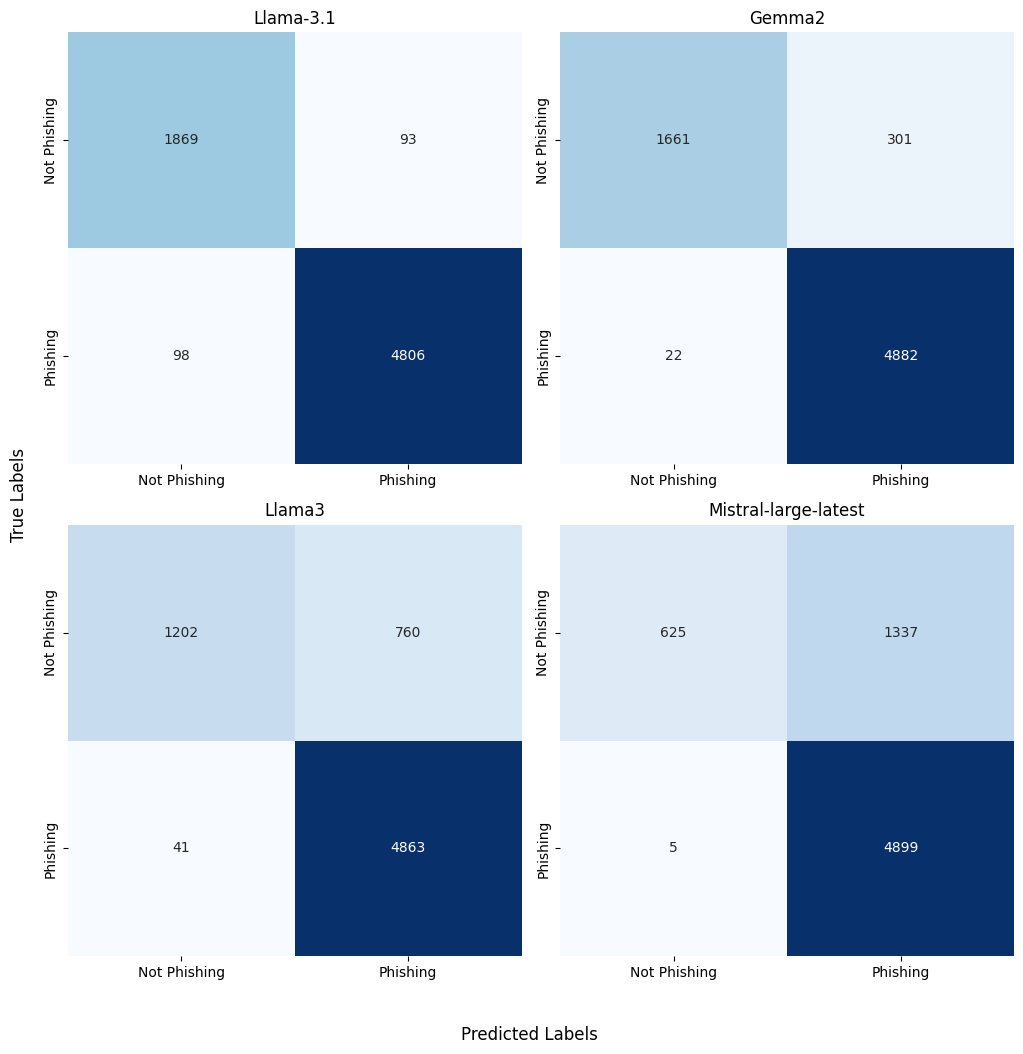

In [ ]:
def confusion_Matrix(dict_result_list):
    '''
    Return a dictionary containing the confusion matrix for each model.

    {llms: confusion_matrix}
    '''
    
    df1 = pd.read_csv(dict_result_list[0])
    df2 = pd.read_csv(dict_result_list[1])
    df3 = pd.read_csv(dict_result_list[2])
    df4 = pd.read_csv(dict_result_list[3])
    df_true = pd.read_csv(dict_result_list[4])

    dict_confusion_matrix = {
        'Llama-3.1': [],
        'Gemma2': [],
        'Llama3': [],
        'Mistral-large-latest': []
    }

    y_true = df_true['Class'].apply(lambda x: 1 if x == 'Phishing' else 0)

    y_pred1 = df1['is_phishing'].apply(lambda x: 1 if x else 0)
    y_pred2 = df2['is_phishing'].apply(lambda x: 1 if x else 0)
    y_pred3 = df3['is_phishing'].apply(lambda x: 1 if x else 0)
    y_pred4 = df4['is_phishing'].apply(lambda x: 1 if x else 0)

    dict_confusion_matrix['Llama-3.1'] = confusion_matrix(y_true, y_pred1)
    dict_confusion_matrix['Gemma2'] = confusion_matrix(y_true, y_pred2)
    dict_confusion_matrix['Llama3'] = confusion_matrix(y_true, y_pred3)
    dict_confusion_matrix['Mistral-large-latest'] = confusion_matrix(y_true, y_pred4)

    return dict_confusion_matrix


def plot_all_confusion_matrices(dict_confusion_matrix):
    '''
    Plot all confusion matrices in a single image using subplots.
    '''
    models = list(dict_confusion_matrix.keys())
    num_models = len(models)
    
    # Set up the subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    
    # Flatten axes array to easily iterate
    axes = axes.flatten()
    
    for i, (model, cm) in enumerate(dict_confusion_matrix.items()):
        ax = axes[i]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                    xticklabels=['Not Phishing', 'Phishing'], yticklabels=['Not Phishing', 'Phishing'], cbar=False)
        ax.set_title(f'{model}')
        
    
    # Add centered labels for the whole figure
    plt.tight_layout()
    fig.text(0.5, -0.04, 'Predicted Labels', ha='center', va='center', fontsize=12)
    fig.text(-0.01, 0.5, 'True Labels', ha='center', va='center', rotation='vertical', fontsize=12)
    
    plt.show()
    
confusion_matrices = confusion_Matrix(dict_result_list)
plot_all_confusion_matrices(confusion_matrices)

## FPR and FNR

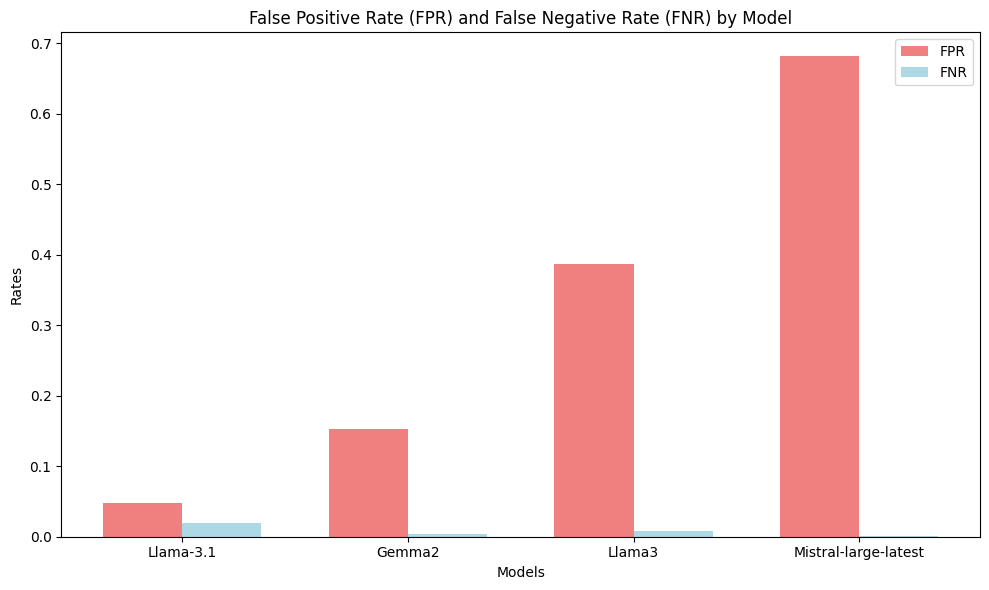

{'Llama-3.1': (np.float64(0.047400611620795105),
  np.float64(0.0199836867862969)),
 'Gemma2': (np.float64(0.15341488277268095), np.float64(0.004486133768352365)),
 'Llama3': (np.float64(0.3873598369011213), np.float64(0.008360522022838499)),
 'Mistral-large-latest': (np.float64(0.68144750254842),
  np.float64(0.0010195758564437193))}

In [9]:
def calculate_fpr_fnr(df_results, df_true, model_results):
    '''
    Calculate False Positive Rate (FPR) and False Negative Rate (FNR) for a given model.
    '''
    # Convert predicted probabilities to binary class (1: Phishing, 0: Legit)
    y_pred = model_results['is_phishing'].apply(lambda x: 1 if x else 0)
    
    # True class (1: Phishing, 0: Legit)
    y_true = df_true['Class'].apply(lambda x: 1 if x == 'Phishing' else 0)
    

    TP = ((y_true == 1) & (y_pred == 1)).sum()  # True Positive
    FP = ((y_true == 0) & (y_pred == 1)).sum()  # False Positive
    TN = ((y_true == 0) & (y_pred == 0)).sum()  # True Negative
    FN = ((y_true == 1) & (y_pred == 0)).sum()  # False Negative
    
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (FN + TP) if (FN + TP) > 0 else 0
    
    return FPR, FNR

def count_risk_score(dict_result_list):

    df1 = pd.read_csv(dict_result_list[0])
    df2 = pd.read_csv(dict_result_list[1])
    df3 = pd.read_csv(dict_result_list[2])
    df4 = pd.read_csv(dict_result_list[3])
    df_true = pd.read_csv(dict_result_list[4])


    fpr_fnr_dict = {
        'Llama-3.1': [],
        'Gemma2': [],
        'Llama3': [],
        'Mistral-large-latest': []
    }
    
    fpr_fnr_dict['Llama-3.1'] = calculate_fpr_fnr(df1, df_true, df1)
    fpr_fnr_dict['Gemma2'] = calculate_fpr_fnr(df2, df_true, df2)
    fpr_fnr_dict['Llama3'] = calculate_fpr_fnr(df3, df_true, df3)
    fpr_fnr_dict['Mistral-large-latest'] = calculate_fpr_fnr(df4, df_true, df4)
    
    return fpr_fnr_dict


fpr_fnr_dict = count_risk_score(dict_result_list)


models = list(fpr_fnr_dict.keys())
fprs = [x[0] for x in fpr_fnr_dict.values()]
fnrs = [x[1] for x in fpr_fnr_dict.values()]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(models))

bar1 = ax.bar(index, fprs, bar_width, label='FPR', color='lightcoral')
bar2 = ax.bar([i + bar_width for i in index], fnrs, bar_width, label='FNR', color='lightblue')

ax.set_xlabel('Models')
ax.set_ylabel('Rates')
ax.set_title('False Positive Rate (FPR) and False Negative Rate (FNR) by Model')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


fpr_fnr_dict

## Reliability score

{'Llama-3.1': 6616.0, 'Gemma2': 6431.0, 'Llama3': 6067.0, 'Mistral-large-latest': 5522.5}
{'Llama-3.1': 0.963588697931838, 'Gemma2': 0.9366443344013982, 'Llama3': 0.8836294785901544, 'Mistral-large-latest': 0.8043256626856976}


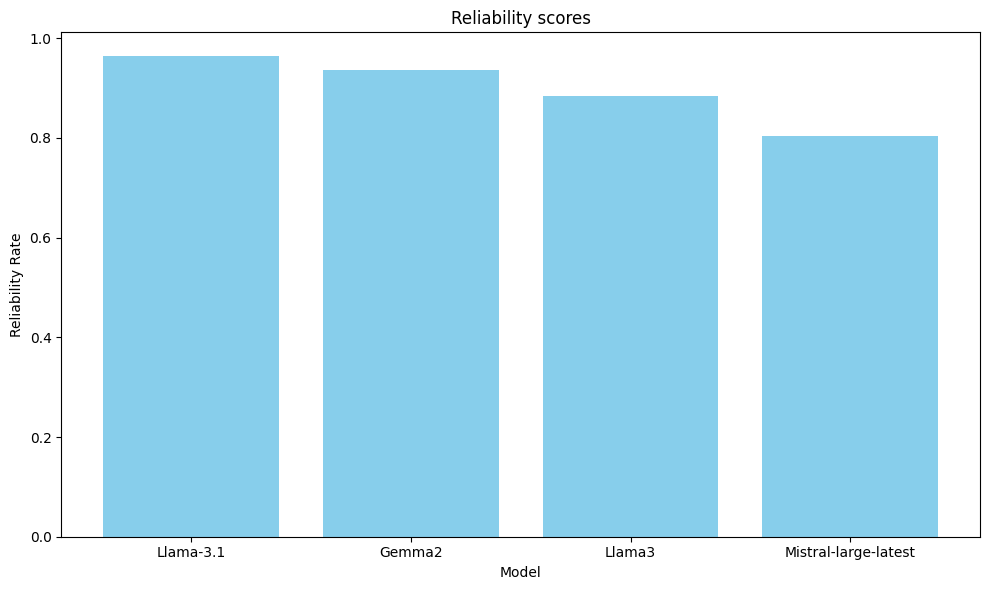

In [ ]:
def calculate_score(df_results, df_true):
    '''
    Calculate score based on given conditions.
    '''
    score = 0

    # Iterate through the rows of the dataframe
    for i, row in df_results.iterrows():
        predicted_risk = row['risk']
        true_class = df_true.loc[i, 'Class']

    
        if predicted_risk == 'high' and true_class == 'Phishing':
            score += 1
        elif predicted_risk == 'low' and true_class == 'Legit':
            score += 1
        elif predicted_risk == 'medium' and true_class in ['Phishing']:
            score += 0.5
        else:
            score += 0

    return score

def count_risk_score(dict_result_list):
    df1 = pd.read_csv(dict_result_list[0])
    df2 = pd.read_csv(dict_result_list[1])
    df3 = pd.read_csv(dict_result_list[2])
    df4 = pd.read_csv(dict_result_list[3])
    df_true = pd.read_csv(dict_result_list[4])

    # Initialize a dictionary to store scores for each model
    model_scores = {}

    # Calculate score for each model
    model_scores['Llama-3.1'] = calculate_score(df1, df_true)
    model_scores['Gemma2'] = calculate_score(df2, df_true)
    model_scores['Llama3'] = calculate_score(df3, df_true)
    model_scores['Mistral-large-latest'] = calculate_score(df4, df_true)

    return model_scores, len(df_true)

# Example usage
model_scores, total_emails = count_risk_score(dict_result_list)

# Normalize the scores by the total number of emails to get the rate
model_rates = {model: score / total_emails for model, score in model_scores.items()}

print(model_scores)
print(model_rates)
# Plotting the model performance rates (FPR/FNR rate)
plt.figure(figsize=(10, 6))
plt.bar(model_rates.keys(), model_rates.values(), color='skyblue')

# Adding title and labels
plt.title('Reliability scores')
plt.xlabel('Model')
plt.ylabel('Reliability Rate')

# Displaying the plot
plt.tight_layout()
plt.show()